Now we will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert out data into a format suitable to feed our classification model. We'll use seaborn and matplotlib for visualizations. We will then import Logistic Regression algorithm from sklearn. This algorithm will help us build our classification model. Lastly, we will use joblib available in sklearn to save our model for future use.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
 
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

We have our data saved in a CSV file called insurance2.csv. We first read our dataset in a pandas dataframe called insuranceDF, and then use the head() function to show the first five records from our dataset.

In [17]:
insuranceDF = pd.read_csv('insurance2.csv')
print(insuranceDF.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


The following features have been provided to help us predict whether a person is diabetic or not:

age : age of policyholder
sex: gender of policy holder (female=0, male=1)
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25
children: number of children / dependents of policyholder
smoker: smoking state of policyholder (non-smoke=0;smoker=1) 
region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
charges: individual medical costs billed by health insurance

Let's also make sure that our data is clean (has no null values, etc).

In [36]:
insuranceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


Let's start by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

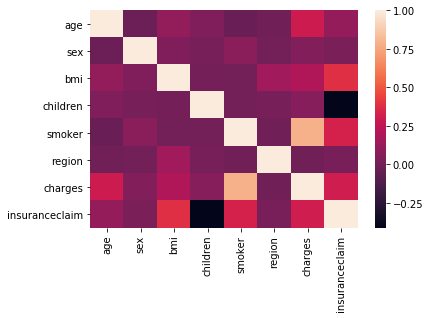

In [37]:
corr = insuranceDF.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In the above heatmap, brighter colors indicate more correlation.

When using machine learning algorithms we should always split our data into a training set and test set. (If the number of experiments we are running is large, then we can should be dividing our data into 3 parts, namely - training set, development set and test set). In our case, we will also separate out some data for manual cross checking.

The data set consists of record of 1338 patients in total. To train our model we will be using 1000 records. We will be using 300 records for testing, and the last 38 records to cross check our model.

In [40]:
dfTrain = insuranceDF[:1000]
dfTest = insuranceDF[1000:1300]
dfCheck = insuranceDF[1300:] 

Next, we separate the label and features (for both training and test dataset). In addition to that, we will also convert them into NumPy arrays as our machine learning algorithm process data in NumPy array format.

In [41]:
trainLabel = np.asarray(dfTrain['insuranceclaim'])
trainData = np.asarray(dfTrain.drop('insuranceclaim',1))
testLabel = np.asarray(dfTest['insuranceclaim'])
testData = np.asarray(dfTest.drop('insuranceclaim',1))

As the final step before using machine learning, we will normalize our inputs. Machine Learning models often benefit substantially from input normalization. It also makes it easier for us to understand the importance of each feature later, when we'll be looking at the model weights. We'll normalize the data such that each variable has 0 mean and standard deviation of 1.

In [42]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
 
trainData = (trainData - means)/stds
testData = (testData - means)/stds

We can now train our classification model. We'll be using a machine simple learning model called logistic regression. Since the model is readily available in sklearn, the training process is quite easy and we can do it in few lines of code. First, we create an instance called insuranceCheck and then use the fit function to train the model.

In [43]:
insuranceCheck = LogisticRegression()
insuranceCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now use our test data to find out accuracy of the model.

In [44]:
accuracy = insuranceCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  85.66666666666667 %


To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect.

Text(0.5,0,'Importance')

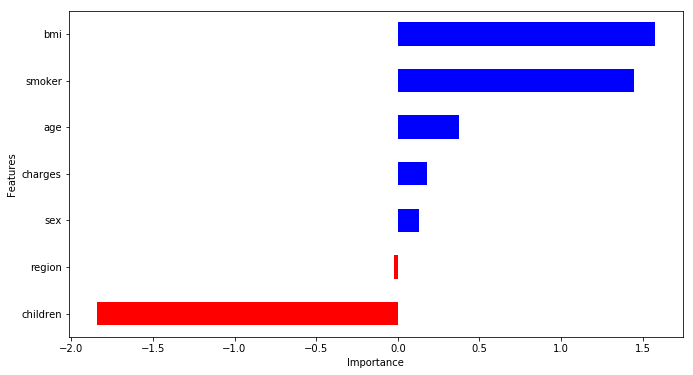

In [26]:
coeff = list(insuranceCheck.coef_[0])
labels = list(dfTrain.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the above figure, we can draw the following conclusions.

1. BMI, Smoker have significant influence on the model, specially BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!

2. Children has a negative influence on the prediction, i.e. higher number children / dependents are correlated with a policyholder not taken insurance claim.

3. Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

Note that this above interpretations require that our input data is normalized. Without that, we can't claim that importance is proportional to weights.

Now save our trained model for future use using joblib.

In [45]:
joblib.dump([insuranceCheck, means, stds], 'insurance01Model.pkl')

['insurance01Model.pkl']

To check whether we have saved the model properly or not, we will use our test data to check the accuracy of our saved model (we should observe no change in accuracy if we have saved it properly).

In [65]:
insuranceLoadedModel, means, stds = joblib.load('insurance01Model.pkl')
accuracyModel = insuranceLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  85.66666666666667 %


Now use our unused 38 data to see how predictions can be made. We have our unused data in dfCheck.

In [51]:
print(dfCheck.head(38))

      age  sex     bmi  children  smoker  region      charges  insuranceclaim
1300   45    1  30.360         0       1       2  62592.87309               1
1301   62    1  30.875         3       1       1  46718.16325               1
1302   25    0  20.800         1       0       3   3208.78700               0
1303   43    1  27.800         0       1       3  37829.72420               1
1304   42    1  24.605         2       1       0  21259.37795               1
1305   24    0  27.720         0       0       2   2464.61880               1
1306   29    0  21.850         0       1       0  16115.30450               1
1307   32    1  28.120         4       1       1  21472.47880               0
1308   25    0  30.200         0       1       3  33900.65300               1
1309   41    1  32.200         2       0       3   6875.96100               0
1310   42    1  26.315         1       0       1   6940.90985               0
1311   33    0  26.695         0       0       1   4571.41305   

Now use the third record to make our insurance claim prediction.

In [53]:
sampleData = dfCheck[2:3]
 
# prepare sample  
sampleDataFeatures = np.asarray(sampleData.drop('insuranceclaim',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
 
# predict 
predictionProbability = insuranceLoadedModel.predict_proba(sampleDataFeatures)
prediction = insuranceLoadedModel.predict(sampleDataFeatures)
print('Insurance Claim Probability:', predictionProbability)
print('Insurance Claim Prediction:', prediction)

Insurance Claim Probability: [[0.95819476 0.04180524]]
Insurance Claim Prediction: [0]
